<a href="https://colab.research.google.com/github/shirinlatifi/pe-project/blob/master/Rs_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#load dataset
# X: Input features
# y: Target values

df = pd.read_excel('solution gas.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pressure  2160 non-null   float64
 1   Rs        2160 non-null   float64
dtypes: float64(2)
memory usage: 33.9 KB


In [ ]:
df.head()

,Pressure,Rs
0,14.7,0.000000
1,54.0,6.176471
2,54.0,6.176471
3,19.0,10.285714
4,30.0,11.428571


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Rs', axis=1), df['Rs'], test_size=0.2, random_state=42)

In [ ]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')  # Single output neuron for regression
])

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
44/44 [==============================] - 1s 8ms/step - loss: 273155.7500 - val_loss: 329818.9688
Epoch 2/500
44/44 [==============================] - 0s 3ms/step - loss: 273155.7812 - val_loss: 329818.9688
Epoch 3/500
44/44 [==============================] - 0s 2ms/step - loss: 273155.7812 - val_loss: 329818.9688
Epoch 4/500
44/44 [==============================] - 0s 3ms/step - loss: 273155.7500 - val_loss: 329818.9688
Epoch 5/500
44/44 [==============================] - 0s 3ms/step - loss: 273155.7188 - val_loss: 329818.9688
Epoch 6/500
44/44 [==============================] - 0s 2ms/step - loss: 273155.7812 - val_loss: 329818.9688
Epoch 7/500
44/44 [==============================] - 0s 3ms/step - loss: 273155.7188 - val_loss: 329818.9688
Epoch 8/500
44/44 [==============================] - 0s 3ms/step - loss: 273155.7500 - val_loss: 329818.9688
Epoch 9/500
44/44 [==============================] - 0s 3ms/step - loss: 273155.7188 - val_loss: 329818.9688
Epoch 10/500
44/44 

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", loss)

14/14 - 0s - loss: 262942.3750 - 264ms/epoch - 19ms/step
Test loss: 262942.375


In [ ]:
# Make predictions
predictions = model.predict(X_test, verbose=2)

14/14 - 1s - 513ms/epoch - 37ms/step


In [ ]:
# acc
from sklearn.metrics import mean_absolute_error , mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

262942.34421432647

In [ ]:
mae = mean_absolute_error(y_test, predictions)
mae

414.2081932741813

In [ ]:
rmse = mean_squared_error(y_test, predictions, squared =False)
rmse

512.7790403422574

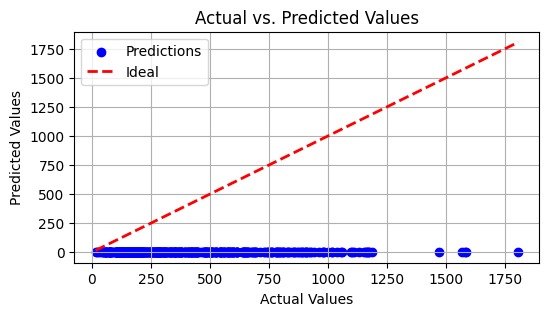

In [ ]:
# visualization
import numpy as np
import matplotlib.pyplot as plt

# Plotting the actual test data and predictions
plt.figure(figsize=(6,3))
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.8 MB/s eta 0:00:00


68/68 [==============================] - 0s 2ms/step
Generation = 1
68/68 [==============================] - 0s 2ms/step
Fitness    = 0.0030683422500071274
68/68 [==============================] - 0s 2ms/step
Generation = 2
68/68 [==============================] - 0s 1ms/step
Fitness    = 0.0030683422500071274
68/68 [==============================] - 0s 1ms/step
Generation = 3
68/68 [==============================] - 0s 2ms/step
Fitness    = 0.0030683422500071274
68/68 [==============================] - 0s 1ms/step
Generation = 4
68/68 [==============================] - 0s 1ms/step
Fitness    = 0.003176303249263813
68/68 [==============================] - 0s 1ms/step
Generation = 5
68/68 [==============================] - 0s 1ms/step
Fitness    = 0.00330346946140775
68/68 [==============================] - 0s 1ms/step
Generation = 6
68/68 [==============================] - 0s 1ms/step
Fitness    = 0.0033063524000442805
68/68 [==============================] - 0s 2ms/step
Generation = 7

/usr/local/lib/python3.10/dist-packages/pygad/visualize/plot.py:21: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


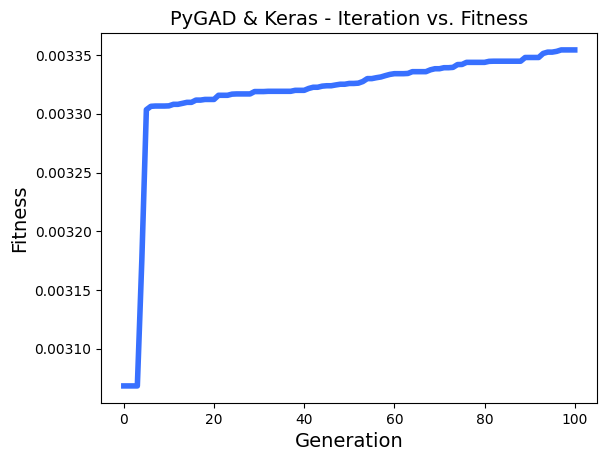

68/68 [==============================] - 0s 2ms/step
Fitness value of the best solution = 0.003354360074601275
Index of the best solution : 0
68/68 [==============================] - 0s 2ms/step
Predictions : 
 [[ 14.188591]
 [ 20.80705 ]
 [ 20.80705 ]
 ...
 [604.5115  ]
 [583.6289  ]
 [588.34436 ]]
Absolute Error :  298.11945


In [ ]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad


def fitness_func(instance,solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions).numpy() + 0.00001
    solution_fitness = 1.0 / abs_error

    return solution_fitness


def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

input_layer  = tensorflow.keras.layers.Input(1)
dense_layer1 = tensorflow.keras.layers.Dense(6, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="relu")(dense_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

weights_vector = pygad.kerasga.model_weights_as_vector(model=model)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = numpy.array(df[['Pressure']])


# Data outputs
data_outputs = numpy.array(df['Rs'])


num_generations = 100
num_parents_mating = 5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(df[['Pressure']])
print("Predictions : \n", predictions)

mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error : ", abs_error)